In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
iris = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\archive\\Iris.csv')
iris=iris.drop(['Id'],axis=1)

In [3]:
# how many data-point and features?
iris.shape

(150, 5)

In [4]:
# what are the column names?
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [20]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# How many data point for each class are present? OR
# How many flowers for each species are present?
iris["Species"].value_counts()

# Its a balanced dataset

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

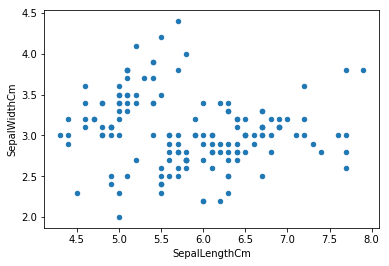

In [7]:
# 2-D SCATTER PLOT
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm');
plt.show()

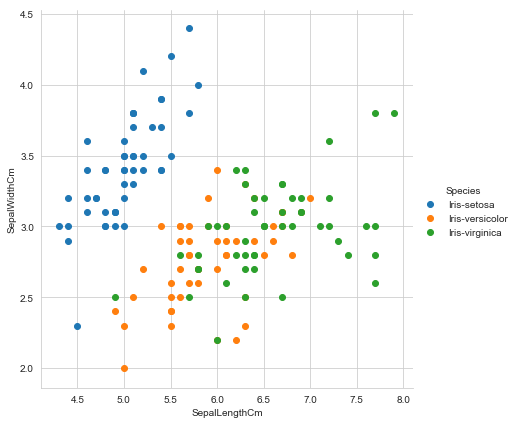

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species",height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

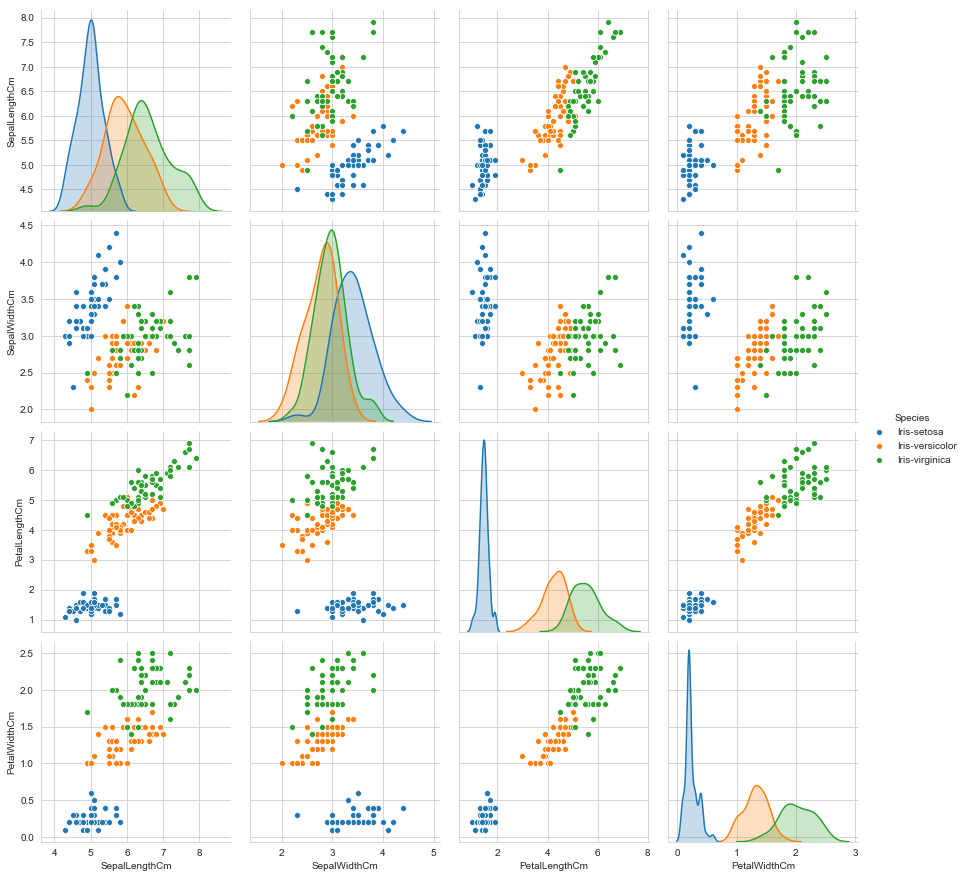

In [9]:
#PAIR PLOT: Pair-wise scatter plot
plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", height=3);
plt.show()

In [10]:
# OBSERVATIONS:
# 1. PetalLengthCm and PetalWidthCm are the most important features to seperate various flowers
# 2. Setosa can be easily seperated, while Virginica and Versicolor has some overlapping, but still seperable to large extent.
# 3. Can use simple if-else ladder to distinguish between various kinds of flowers

In [11]:
iris_setosa = iris.loc[iris["Species"] == "setosa"];
iris_virginica = iris.loc[iris["Species"] == "virginica"];
iris_versicolor = iris.loc[iris["Species"] == "versicolor"];


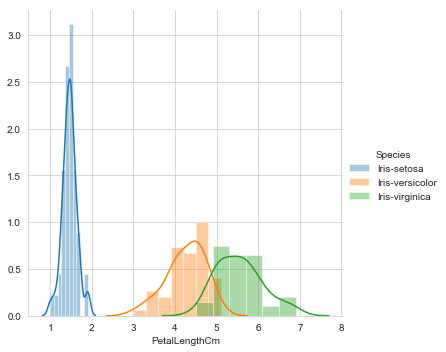

In [12]:
#1
sns.FacetGrid(iris,hue="Species", height=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show()

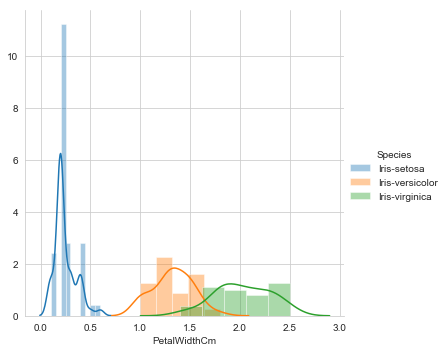

In [13]:
#2
sns.FacetGrid(iris,hue="Species", height=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show()

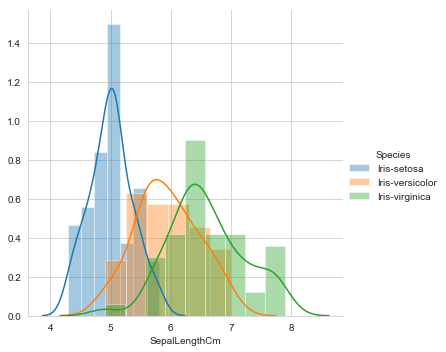

In [14]:
#3
sns.FacetGrid(iris,hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show()

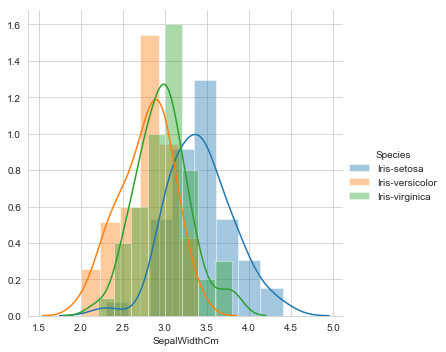

In [15]:
#4
sns.FacetGrid(iris,hue="Species", height=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show()

In [16]:
#Observations:
# After observing #1,#2,#3,#4, we can conclude the PetalLengthCm is the most practicable univariate parameter to distinguish between various flowers

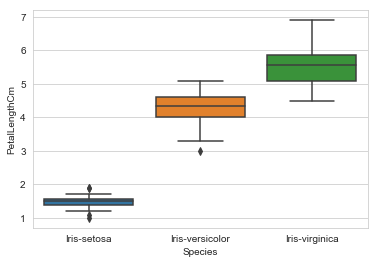

In [17]:
#BOX PLOT AND WHISHKERS
# Whiskers do not always corresponds to min max values
# Box- plot can be visualised as PDF on the side-ways.
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.show()

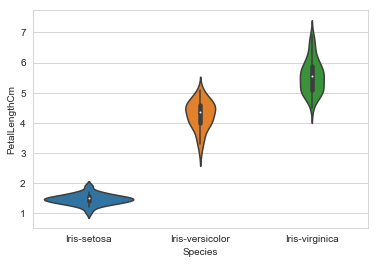

In [18]:
#A violin plot combines the benefits of
#-histogram and PDF
#-box-plot

#Denser regions of the data are fatter, and sparser ones thinner
sns.violinplot(x='Species',y="PetalLengthCm",data=iris, size=10)
plt.show()

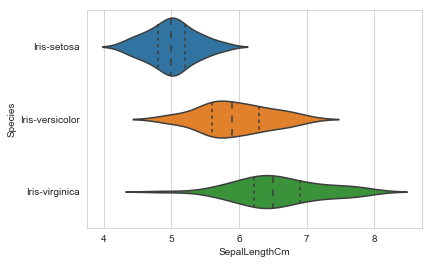

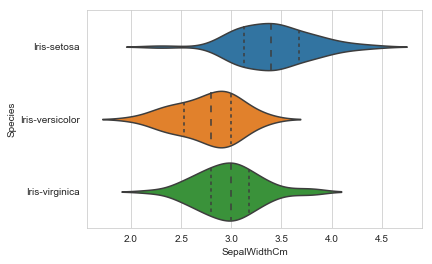

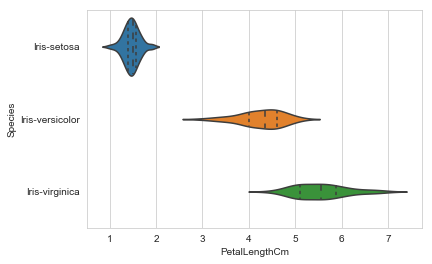

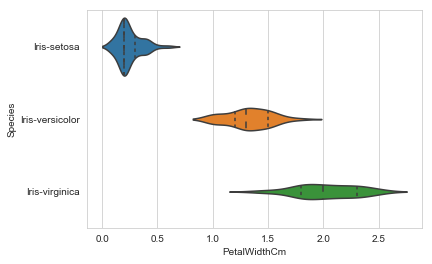

In [26]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()


# Modeling with scikit-learn

In [124]:
train, test = train_test_split(iris, test_size = 0.3)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [126]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

In [127]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
41,4.5,2.3,1.3,0.3


In [128]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
44,5.1,3.8,1.9,0.4
110,6.5,3.2,5.1,2.0


In [129]:
train_y.head()

92    Iris-versicolor
41        Iris-setosa
40        Iris-setosa
95    Iris-versicolor
30        Iris-setosa
Name: Species, dtype: object

In [140]:
#Figuring out the best algorithm from the following:
#1. SVM
#2. Logistic Regression
#3. K – Nearest Neighbour (KNN)

# Support Vector Machine (SVM)

In [172]:
model_svm = svm.SVC(gamma='auto') #select the algorithm
model_svm.fit(train_X,train_y) # train the algorithm with the training data and the training output
prediction=model_svm.predict(test_X) #passing the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#checking the accuracy of the algorithm. 

The accuracy of the SVM is: 0.9333333333333333


# Logistic regression

In [173]:
model_lr = LogisticRegression(solver='lbfgs', multi_class='auto')
model_lr.fit(train_X,train_y)
prediction=model_lr.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9333333333333333


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# KNN

In [174]:
model_knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_knn.fit(train_X,train_y)
prediction=model_knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


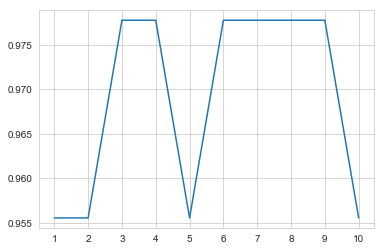

In [143]:
# checking for different values of k:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

# best-accuracy: 3,4,6,7,8,9

In [145]:
# creating petals and sepals training data
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [146]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [155]:
#SVM
model1=svm.SVC(gamma='auto')
model1.fit(train_x_p,train_y_p) 
prediction=model1.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model1=svm.SVC()
model1.fit(train_x_s,train_y_s) 
prediction=model1.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [156]:
#Logistic Regression
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')
model2.fit(train_x_p,train_y_p) 
prediction=model2.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model2.fit(train_x_s,train_y_s) 
prediction=model2.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [157]:
#KNN
model3=KNeighborsClassifier(n_neighbors=3) 
model3.fit(train_x_p,train_y_p) 
prediction=model3.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model3.fit(train_x_s,train_y_s) 
prediction=model3.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


In [ ]:
# OBSERVATION:

# Using Petals over Sepal for training the data gives a much better accuracy.

In [178]:
# verifying with new sets of data
X_new = np.array([[3, 2, 4, 0.2], [4.7, 3, 1.3, 0.2 ], [2.3,2,2.2,0.2]])    
print("X_new.shape: {}".format(X_new.shape))  

X_new.shape: (3, 4)


In [179]:
prediction = model_svm.predict(X_new)    
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [180]:
prediction = model_lr.predict(X_new)    
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [181]:
prediction = model_knn.predict(X_new)    
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa']
